In [37]:
import pandas as pd
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import Memory
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import scatter

In [38]:
data = load_wine()
x, y = data.data, data.target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [40]:
scaler = StandardScaler().fit(X_train)
X_test_std = scaler.transform(X_test)
X_train_std = scaler.transform(X_train)
#copy and paste from chat

In [41]:
dummy_clf = DummyClassifier()
#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [48]:
dummy_clf.fit(X_test_std, y_test)
print(f"TEST score: {dummy_clf.score(X_test_std, y_test)}")
dummy_clf.fit(X_train_std, y_train)
print(f"TRAIN score: {dummy_clf.score(X_train_std, y_train)}")
#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

TEST score: 0.4222222222222222
TRAIN score: 0.39849624060150374


In [51]:
k_test = {}
k_train = {}
#copy and paste from chat

In [59]:
for i in range(1, 12):
    kneighbor_clf = KNeighborsClassifier(n_neighbors=i)
    kneighbor_clf.fit(X_test_std, y_test)
    k_test[i] = kneighbor_clf.score(X_test_std, y_test)
    kneighbor_clf.fit(X_train_std, y_train)
    k_train[i] = kneighbor_clf.score(X_train_std, y_train)
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#loop is in range 12 because we want to check 10 scores. The first one is 100%

In [65]:
for value in k_test.items():
    print(f"TEST score {value}")

print(f"")    
    
for value in k_train.items():
    print(f"TRAIN score{value}")

TEST score (1, 1.0)
TEST score (2, 0.8888888888888888)
TEST score (3, 0.9333333333333333)
TEST score (4, 0.9111111111111111)
TEST score (5, 0.9555555555555556)
TEST score (6, 0.9333333333333333)
TEST score (7, 0.9555555555555556)
TEST score (8, 0.9111111111111111)
TEST score (9, 0.9333333333333333)
TEST score (10, 0.9111111111111111)
TEST score (11, 0.9333333333333333)

TRAIN score(1, 1.0)
TRAIN score(2, 0.9849624060150376)
TRAIN score(3, 0.9774436090225563)
TRAIN score(4, 0.9774436090225563)
TRAIN score(5, 0.9774436090225563)
TRAIN score(6, 0.9774436090225563)
TRAIN score(7, 0.9624060150375939)
TRAIN score(8, 0.9774436090225563)
TRAIN score(9, 0.9699248120300752)
TRAIN score(10, 0.9624060150375939)
TRAIN score(11, 0.9699248120300752)


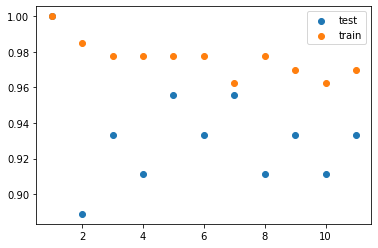

In [66]:
plot_x, plot_y = k_test.keys(), k_test.values()
plot_x1, plot_y1 = k_train.keys(), k_train.values()
plt.scatter(plot_x, plot_y)
plt.scatter(plot_x1, plot_y1)
plt.legend(['test', 'train'])
plt.show()
#https://www.w3schools.com/python/python_ml_train_test.asp